In [1]:
# load data
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

In [0]:
# load data
data =pd.read_csv('/content/gdrive/My Drive/data_wordvectors.csv', sep=',').iloc[:, 1:]
vectors = data[["x1", "x2", "x3", "x4", "x5",
                  "x6", "x7", "x8", "x9", "x10",
                  "x11", "x12", "x13", "x14", "x15",
                  "x16", "x17", "x18", "x19", "x20"]]
vectors = np.array(vectors)

In [0]:

category_color = {'CDU' : 'black',
                 'SPD': 'red',
                 'Grüne' : 'green',
                 'AfD' : 'brown',
                 'Linke': 'darkred',
                 'FDP' : 'yellow'}
  
category_color2 = {'Annegreth Kramp-Karrenbauer': 'black',
                  'Angela Merkel': 'black',
                  'Katharina Barley': 'red',
                  'Andrea Nahles': 'red',
                   "Cem Özdemir":'limegreen',
                 "Kathrin Goering-Eckardt":'limegreen',
                 "Alice Weidel": 'brown',
                 "Jörg Meuthen": 'brown',
                 "Sarah Wagenknecht": 'darkred',
                 "Christian Lindner": 'yellow'}
category_short = {'Annegreth Kramp-Karrenbauer': 'AKK',
                  'Angela Merkel': 'AM',
                  'Katharina Barley': 'KB',
                  'Andrea Nahles': 'AN',
                   "Cem Özdemir":'CÖ',
                 "Kathrin Goering-Eckardt":'KGE',
                 "Alice Weidel": 'AW',
                 "Jörg Meuthen": 'JM',
                 "Sarah Wagenknecht": 'SW',
                 "Christian Lindner": 'CL'}

In [0]:
from minisom import MiniSom
map_dim = 16
som = MiniSom(map_dim, map_dim, 20, sigma=1.0, random_seed=1)

In [0]:
som.train_batch(vectors, len(vectors)*10)

In [0]:
user_map = som.labels_map(vectors, data['real'])

In [65]:
user_map.items()

dict_items([((6, 7), Counter({'Annegreth Kramp-Karrenbauer': 2})), ((4, 8), Counter({'Annegreth Kramp-Karrenbauer': 1})), ((10, 13), Counter({'Annegreth Kramp-Karrenbauer': 2})), ((9, 0), Counter({'Annegreth Kramp-Karrenbauer': 1})), ((6, 3), Counter({'Annegreth Kramp-Karrenbauer': 1, 'Kathrin Goering-Eckardt': 1})), ((11, 12), Counter({'Annegreth Kramp-Karrenbauer': 1})), ((3, 4), Counter({'Annegreth Kramp-Karrenbauer': 1, 'Christian Lindner': 1})), ((7, 7), Counter({'Annegreth Kramp-Karrenbauer': 1})), ((0, 2), Counter({'Annegreth Kramp-Karrenbauer': 1, 'Jörg Meuthen': 1})), ((7, 8), Counter({'Annegreth Kramp-Karrenbauer': 1})), ((10, 12), Counter({'Annegreth Kramp-Karrenbauer': 1})), ((15, 10), Counter({'Annegreth Kramp-Karrenbauer': 1})), ((5, 3), Counter({'Annegreth Kramp-Karrenbauer': 1, 'Andrea Nahles': 1})), ((0, 8), Counter({'Annegreth Kramp-Karrenbauer': 1})), ((7, 5), Counter({'Annegreth Kramp-Karrenbauer': 1})), ((8, 15), Counter({'Annegreth Kramp-Karrenbauer': 1})), ((10, 

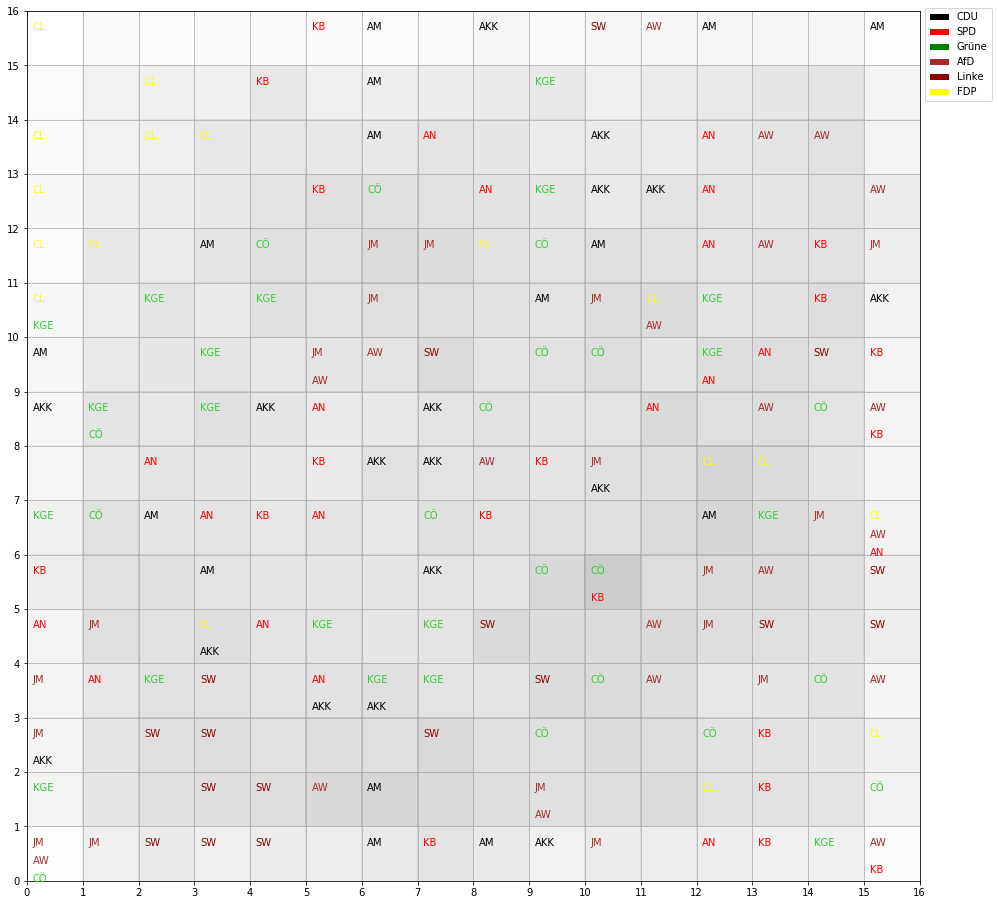

In [69]:

plt.figure(figsize=(map_dim, map_dim))
plt.pcolor(som.distance_map().T, cmap='gray_r', alpha=.2)
plt.xticks(np.arange(map_dim+1))
plt.yticks(np.arange(map_dim+1))
plt.grid()

for p, countries in user_map.items():
    countries = list(countries)
    x = p[0] + .1
    y = p[1] - .3
    for i, c in enumerate(countries):
        off_set = (i+1)/len(countries) - 0.05
        plt.text(x, y+off_set, category_short[c], color = category_color2[c],  fontsize=10)

legend_elements = [Patch(facecolor=clr,
                         edgecolor='w',
                         label=l) for l, clr in category_color.items()]
plt.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1, .95))
plt.show()

Sources:
https://github.com/JustGlowing/minisom/blob/master/examples/DemocracyIndex.ipynb